In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
def birthdays(pop_size):
  bday = np.random.choice(range(0,365),size=pop_size , replace=True, )
  return bday

In [4]:
def match(pop_size):
  bday = birthdays(pop_size)
  for i in range(0,len(bday)-1):
    for y in range(i+1,len(bday)):
      if bday[i] == bday[y]:
        return 1
  return 0

In [5]:
def prob(pop_size, num_iters):
  count = 0
  for i in range(num_iters):
    count+= match(pop_size)
  return count/num_iters

In [6]:
def full(num_iters):
  d1 = {}
  d1["num"] = []
  d1["probs"] = []
  d1["Type"] = []
  for i in range(2, 101):
    d1["num"].append(i)
    d1["probs"].append(prob(i, num_iters))
    d1["Type"].append("Simulated")
  return d1



In [7]:
def fullbday(num_iters):
  d1 = {}
  d1["Type"] = []
  d1["num"] = []
  d1["probs"] = []
  for i in range(2, 101):
    d1["num"].append(i)
    d1["probs"].append(bdayprob(i))
    d1["Type"].append("Actual")
  return d1

In [8]:
def bdayprob(n):
  prod = 1
  for i in range(1, n+1):
    prod *=(365-i)/365
  return 1 - prod
bdayprob(23)

0.538344257914529

if there are n people at your party, prob that at least 2 have the same birthday = p(n)

[Text(0.5, 1.0, 'Chance of shared birthday in x People'),
 Text(0.5, 0, 'Population Size'),
 Text(0, 0.5, 'probability of shared birthday')]

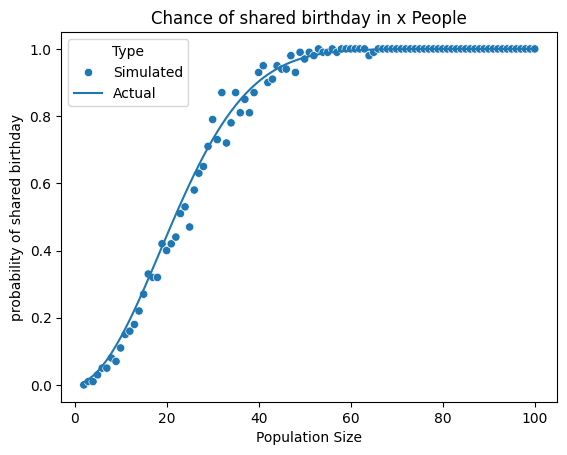

In [9]:
d1 = full(100)
d2 = fullbday(100)
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
sns.scatterplot(x= df1["num"], y = df1["probs"], hue = df1["Type"]).set(title="Chance of shared birthday in x People", xlabel = "Population Size", ylabel = "probability of shared birthday")
sns.lineplot(x= df2["num"], y = df2["probs"], hue = df2["Type"]).set(title="Chance of shared birthday in x People", xlabel = "Population Size", ylabel = "probability of shared birthday")